<a href="https://colab.research.google.com/github/SchmetterlingIII/D.T./blob/main/extension.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Extension


### Part I: EyeBall
I would like to do geometric optics on an eye. Not for Andrew French's suggestion of the physics being analysed to help improve people's vision but focusing on raindrops and the refraction of white light in water.

All parameters of this should be accounted for since I want a visualisation - without any quantum effects - of Rayleigh Scattering, where shorter wavelength light scatter more than longer wavelength light.

I would like this to run as a simulation that can be pretty crudely analysed and demonstrated.

*For this section, just a simple plotting of the interaction of a ray onto a surface whose internal refractive index is that of water is all that is necessary.*

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as ipy
import random

There are two roots from this.
There is a chance that it is tangential, meaning the root is repeated.


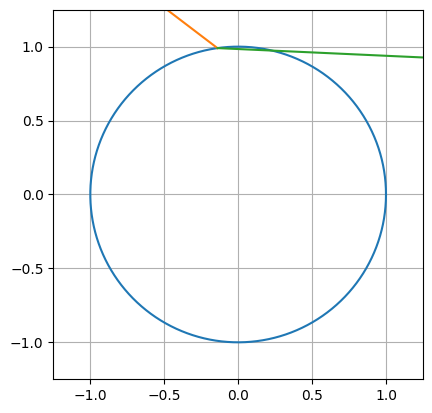

In [3]:
# plotting environment
fig, ax = plt.subplots()

# circle
t = np.arange(0, (2 * np.pi), 0.0025)

x = np.cos(t)
y = np.sin(t)

ax.plot(x,y)

# randomised line
m_1 = np.random.uniform(-1, 1) # gradient
y_1 = np.random.uniform(-1, 1) # y_intercept

a = (m_1 ** 2) + 1
b = (2 * m_1 * y_1)
c = (y_1 ** 2) - 1

### check discriminant
d = (b ** 2) - (4 * a * c)

### solve equation
x_values = []
if d < 0:
    print("There are no real solutions to this.\nOnly a circle will be plotted.")
elif d >= 0:
    print("There are two roots from this.\nThere is a chance that it is tangential, meaning the root is repeated.")
    x1 = (-b+np.sqrt(b**2-4*a*c))/(2*a)
    x2 = (-b-np.sqrt(b**2-4*a*c))/(2*a)
    x_values.extend([x1, x2])

min_x = min(x_values) # where the line first intersects the circle (from the left)

x_l = np.linspace(-5, min_x, 1000)
y_l = (m_1 * x_l) + y_1

ax.plot(x_l, y_l)
# refraction handling
n_1 = 1 # air
n_2 = 13.3 # water

theta_1 = np.arctan(m_1) # converts the initial randomised gradient into an angle
theta_2 = np.arcsin((n_1 / n_2) * np.sin(theta_1))  # Correct Snell's law

m_2 = np.tan(theta_2) # gradient of refracted ray
x_i, y_i = min_x, ((m_1 * min_x) + y_1) # intersection points of incident line and circle

x_r = np.linspace(x_i, 10, 1000) # I will calculate the emergent point later
y_r = m_2 * (x_r - x_i) + y_i

ax.plot(x_r, y_r)
# emergence handling

# plotting parameters
ax.set_xlim(-1.25, 1.25)
ax.set_ylim(-1.25, 1.25)
ax.set_aspect(1)
ax.grid()

#ax.legend()

## now try to put this into a class where I can change n and automatically 15 lines do this

### Part II: Classes & Boids
The detailed model of the one *EyeBall* can then be "extrapolated" onto an $n$-number of raindrops where an array of white light can be shone onto the environment and these reactions can take place to show what is happening

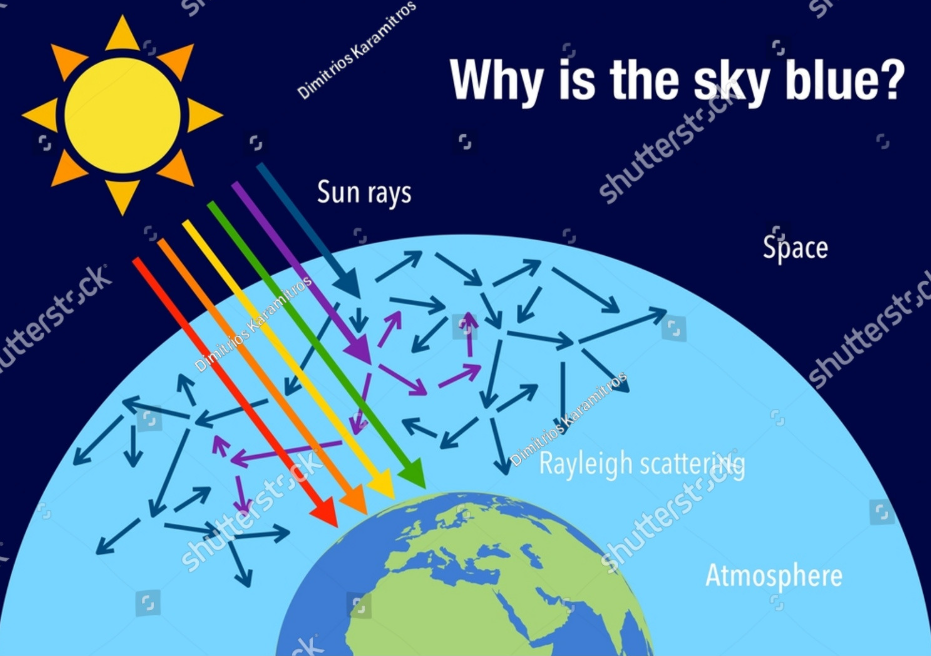

The above image is all that I want to do: I just want a source (the entire left wall) that emits discrete wavelengths of light (ranging from violet to red) and demonstrating the scattering effect in a geometric way.

In [111]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
import matplotlib.cm as cm

In [ ]:
a = (8, 9)
b = np.array(a)
c = a/np.linalg.norm(a)
print(c)

[0.66436384 0.74740932]


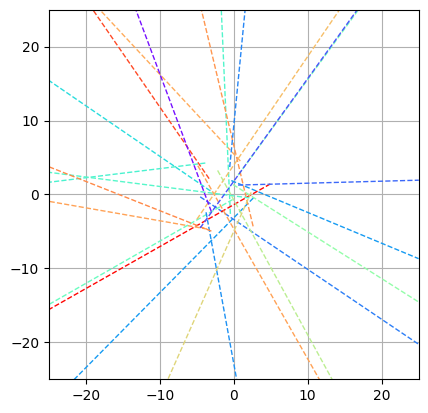

In [116]:
# colour map (copied from task 1b)
c = 3e8
wavelength_nanometres = np.arange(405, 795, 1)
true_wavelength_list = wavelength_nanometres * 1e-9
frequency_list = c / true_wavelength_list

embed_1 = np.sqrt(1/(1.731 - 0.261 *((frequency_list/(10**15))**2)))
n_discrete = np.sqrt(embed_1 + 1)

n_array = np.array(n_discrete)
colours = cm.rainbow(np.linspace(0,1,len(n_array)))

def wavelength_to_colour(wavelength_nm):
    # Map wavelength directly to rainbow colormap
    # 405nm = violet (0), 795nm = red (1)
    normalized = (wavelength_nm - 405) / (795 - 405)
    return cm.rainbow(normalized)

class Ray:
    def __init__(self, position, direction, wavelength):
        self.position = position # starting vector position on the map

        self.direction = direction/np.linalg.norm(direction) # normalised value

        self.wavelength = wavelength # nanometre input

        """
        I initially included intensity into this model, but I do not understand how I would incorporate this into the vector display of the rays.
        If I have the time later, I will add it.
        """

    def get_refractive_index(self):
        # wavelength are inputted in metres
        # currently using emperical values for this equation

        # input wavelength
        w = self.wavelength * 1e-9 # convert nanometre input into metres
        f = c / w
        n = np.sqrt(1 + (np.sqrt(1/(1.731 - 0.261 * ((f/1e15) ** 2)))))

        """
        The rest of this code was made global in the cell above to reduce computation
        """

        ## find the position of n in n_list by finding its closest value
        ## previously I tried to find the exact value but floating point error (again)
        ## meaning it has to be handled (relatively) approximately
        n_index = (np.abs(n_array - n)).argmin()

        ## index the same in the colours list
        colour = colours[n_index]
        colour = wavelength_to_colour(self.wavelength)

        return n, colour

    def ray_plotting(self): # this type of plotting only occurs if there is no intersection between a ray and a raindrop
        """
        Define this plotting function of displaying just a white line that pertains to the colour of the inputted wavelength.
        Since this should be done automatically, I will use the matplotlib colours thing (matplotlib.cm)
        Then, the index of the wavelength in this list will be the colour that will be plotted
        """
        n, colour = self.get_refractive_index()

        dx, dy = self.direction[0], self.direction[1]
        x, y = self.position[0], self.position[1]
        t = np.linspace(0, 500, 10000)
        x_plot = [(x + t * dx) for t in t]
        y_plot = [(y + t * dy) for t in t]

        return [(x_plot, y_plot), colour]

for i in range(25):
    a = np.random.uniform(-5,5)
    b = np.random.uniform(-5,5)
    c = np.random.uniform(-5,5)
    d = np.random.uniform(-5,5)
    e = np.random.choice(np.arange(405, 795, 1))

    ray = Ray((a,b), (c,d), e)
    plotting, colour = ray.ray_plotting()
    plt.plot(plotting[0], plotting[1], "--", color=colour, linewidth=1)

lim = 25

plt.xlim(-lim, lim)
plt.ylim(-lim, lim)
plt.gca().set_aspect(1)
plt.grid()
plt.show()

In [113]:
class RainDrop:
    def __init__(self, centre, radius):
        self.centre = centre # this will be updated with the collision aspect of it. To be implemented later
        self.radius = radius

    def equation(self):
        t = np.linspace(0, 2*np.pi, 1000)

        x = self.radius * np.cos(t)
        y = self.radius * np.sin(t)

        return [(x + self.centre[0]),(y + self.centre[1])]

    def find_intersection(self, ray):
        x_1, y_1 = ray.position # starting point of ray
        dx, dy = ray.direction  # direction vector
        x_2, y_2 = self.centre  # circle centre
        r = self.radius

        """
        How would I know which intersection point to choose.
        To begin with I would just choose the value with the minimum x value, since the ray was always going to move from left to right.
        This is no longer the case, given the internal reflections of the rays, which will cause it to occur at any side.
        How to handle?
        """
        # parametric equations in terms of t: at^2 + bt + c = 0
        # x = x_1 + t * dx ; y = y_1 + t * dy
        """
        This can handle when dx=0 which is much more likely in this instance given how many rays there will be.
        Thus, I will use this parametric form.
        """
        a = dx**2 + dy**2                           # t**2
        b = 2*(dx*(x_1 - x_2) + dy*(y_1 - y_2))     # t
        c = (x_1 - x_2)**2 + (y_1 - y_2)**2 - r**2  # constant

        # discriminant conditionals
        d = b**2 - 4*a*c

        """
        Return options:
        1. Two distinct roots
        2. Repeated root
        3. They do not intersect therefore output is None # this shoudld be handled well in other circumstances
        """

        if d < 0: # no real solutions
            return None

        # this handles repeated roots as well
        t1 = (- b + np.sqrt(d)) / (2 * a)
        t2 = (- b - np.sqrt(d)) / (2 * a)

        """
        Floating point erros have been the antagonist to this story.
        Never use 0, always use EPSILON
        """
        EPSILON = 1e-6
        # validate t and choose the closest intersection point
        # otherwise it would randomly migrate to the other side of the raindrop
        validated_t = [t for t in [t1, t2] if t>=EPSILON]

        if len(validated_t) == 0:
            return None

        else:
            t = min(validated_t)
            x = x_1 + t*dx
            y = y_1 + t*dy

            return (x,y)

    def get_surface_normal(self, intersection_point):
        if intersection_point is None:
            print("These points do not intersect") # can only do this with initial tests of the code
            return None
        else:
            cx, cy = self.centre
            ix, iy = intersection_point

            # Vector from center to intersection
            normal_x = (ix - cx) / self.radius
            normal_y = (iy - cy) / self.radius

            m = normal_y/normal_x

            return (normal_x, normal_y)

    def TIR_handle(self, incident, normal):
        incident_ray = incident
        surface_normal = normal

        unit_normal = surface_normal / np.linalg.norm(surface_normal)

        # Calculate the dot product: v . n_hat
        dot_product = np.dot(incident_ray, unit_normal)

        # Apply the standard reflection formula: v_ref = v - 2 * (v . n_hat) * n_hat
        reflected_ray = incident_ray - 2 * dot_product * unit_normal

        return reflected_ray

    def refraction_ray(self, ray, intersection_point):
        """
        The change from the previous code is present in the writeup.
        The main issue with that was the frequent square root aggregated the effects of floating point error, which isn't good.
        """
        # Conditions: find the dot product of the normal and incident to see its direction initially
        # This will determine the final step
        normal = self.get_surface_normal(intersection_point)
        incident = ray.direction

        # Normalize both vectors
        normal = normal / np.linalg.norm(normal)
        incident = incident / np.linalg.norm(incident)

        # Determine entering/exiting
        to_center = self.centre - intersection_point
        entering = np.dot(incident, to_center) > 0
        if entering:
            n1, n2 = 1.0, ray.get_refractive_index()[0]
            # Decompose
            incident_parallel = np.dot(incident, normal) * normal # normal component
            incident_perp = incident - incident_parallel # tangent component

            # Apply Snell's law to perpendicular part
            refracted_perp = (n1 / n2) * incident_perp
        else:
            n1, n2 = ray.get_refractive_index()[0], 1.0
            # Decompose
            incident_parallel = np.dot(incident, normal) * normal # normal component
            incident_perp = incident - incident_parallel # tangent component

            # Apply Snell's law to perpendicular part
            refracted_perp = (n2 / n1) * incident_perp

        # Parallel part from magnitude relation
        mag_refracted_parallel_sq = 1 - np.linalg.norm(refracted_perp)**2
        if mag_refracted_parallel_sq < 0:
            return self.TIR_handle(incident, normal)
            # more information in the writeup

        # Apply sign convention
        if entering:
            refracted_parallel = -np.sqrt(mag_refracted_parallel_sq) * normal

        else:
            refracted_parallel = np.sqrt(mag_refracted_parallel_sq) * normal

        refracted = refracted_perp + refracted_parallel
        return refracted / np.linalg.norm(refracted)

### Initial Plotting Function
**You can check this in the version history**.

In [114]:
import ipywidgets as ipy

---------------

### Updated Pseudocode
**Below is the pseudocode for the plot I am to implement that will handle all cases and hopefully allow me to directly move onto data analysis (since the way that this is handled means that the final position vector is stored and can easily be placed into a pandas DataFrame for use in a heatmap (as the colour mapping is there)).**

After this is done, I will try to convert the colour values of the rays (see how matplotlib stores colours) and then convert those into a number between 1 and 0 for extra plotting.

Also, to learn algorithmic complexity to try and calculate the maximum number of rays I can display (for the video) to get this plot working.

This code is the bane of my mental health and a full night's sleep. I think the error has been that the rays cannot recognise whether the normal it is interfering with is the inside or outside of a raindrop.

I changed the Raindrop.get_surface_normal() function but now need to handle this in this code and develop a whole bunch of conditionals to handle this.

I cannot progress if I haven't done this.

In [135]:
def atmosphere_plotting(num_rays=1, num_raindrops=1, max_L=1, lim=10):
    fig, ax = plt.subplots(figsize=(10,10))

    # constants
    lim = lim
    domain_bounds = [-lim, lim]
    max_L = max_L
    eps = 1e-7 # to handle division by zero (in a lazy way)

    # definitions
    ray_list = []
    raindrop_list = []
    final_positions = []

    ## define rays
    for each_ray in range(num_rays):
        rand_dir = (np.random.uniform(-10,10), np.random.uniform(-1,1))
        rand_pos = np.random.uniform(-lim, lim)
        rand_wl = np.random.choice(np.arange(406, 795, 1)) # randomised wavelength
        ray = Ray((domain_bounds[0], rand_pos), (rand_dir[0], rand_dir[1]), rand_wl)
        colour = ray.get_refractive_index()[1]
        ray_list.append((ray, colour))

    ## define raindrops
    for each_raindrop in range(num_raindrops):
        rand_centre = [np.random.uniform(-lim,lim) for i in range(2)]
        rand_radius = np.random.uniform(0.05, 0.3)
        raindrop = RainDrop((rand_centre[0], rand_centre[1]), rand_radius)
        rain = raindrop.equation()
        raindrop_list.append(raindrop)
        ax.fill(rain[0], rain[1], color='lightblue', alpha=0.7)
        ax.plot(rain[0], rain[1], "--", color='k', linewidth=1, alpha=0.8)

    # set plotting environment
    ax.set_xlim(-lim,lim)
    ax.set_ylim(-lim, lim)

    for each_ray in ray_list:
        path_segments = []
        total_length = 0 # magnitude(path_segments)
        iteration_count = 0
        ray = each_ray[0]
        colour = each_ray[1]
        final_positions.append((path_segments, colour))


        ## an exceptionally clunky way of defining whether the ray is in the plotting environemnt **and** is less than total length
        while total_length < max_L:
            iteration_count += 1
            # safety check break for debugging
            ## to handle floating point nonsense
            if iteration_count > 200:
                print(f"Breaking after {iteration_count} iterations")
                print(f"Ray position: {ray.position}")
                print(f"Ray direction: {ray.direction}")
                print(f"Total length: {total_length}")
                break

            intersections_found = []
            for raindrop in raindrop_list:
                ray.position = np.array(ray.position)
                # if intersection
                if raindrop.find_intersection(ray) is not None:
                    # add coordinate to intersections_found
                    ## also add the associated raindrop that goes with it
                    ## this will help later (for the refraction calculation)
                    intersection_coordinate = np.array(raindrop.find_intersection(ray))
                    intersections_found.append( (intersection_coordinate, raindrop) )

            # check if list is empty, handle this case for plotting
            if len(intersections_found) == 0:
                """
                Initially plotted a line from the ray.position_x_value to right side of the domain boundary.
                This handles it better (at it can now leave out of any boundary (important if it turns to the left))
                """
                t_values = []

                # right boundary: x = domain_bounds[1]
                if ray.direction[0] > 0:
                    t_right = (domain_bounds[1] - ray.position[0]) / ray.direction[0]
                    t_values.append(t_right)

                # left boundary: x = domain_bounds[0]
                if ray.direction[0] < 0:
                    t_left = (domain_bounds[0] - ray.position[0]) / ray.direction[0]
                    t_values.append(t_left)

                # top boundary: y = domain_bounds[1]
                if ray.direction[1] > 0:
                    t_top = (domain_bounds[1] - ray.position[1]) / ray.direction[1]
                    t_values.append(t_top)

                # bottom boundary: y = domain_bounds[0]
                if ray.direction[1] < 0:
                    t_bottom = (domain_bounds[0] - ray.position[1]) / ray.direction[1]
                    t_values.append(t_bottom)

                # find smallest positive t (closest boundary)
                pos_t_values = ([t for t in t_values if t > 0])
                if not pos_t_values:
                    break
                t_exit = min(pos_t_values)
                boundary_point = ray.position + t_exit * ray.direction

                # The ray travels in a straight line for the rest of its allowed length.
                remaining_length = max_L - total_length
                final_point = ray.position + remaining_length * ray.direction

                path_segments.append((ray.position, final_point))
                total_length += remaining_length
                break

            # choose the coordinate who is closest to this intersection point
            # do this by finding the index of the closest one
            ## length between points
            intersection_lengths = [np.linalg.norm(point - ray.position) for point, rd in intersections_found]
            min_index = intersection_lengths.index(min(intersection_lengths))

            intersection_coordinate = intersections_found[min_index][0]
            ## determine which raindrop corresponds to the closest intersection point
            closest_raindrop = intersections_found[min_index][1]

            segment_start = ray.position
            segment_end = intersection_coordinate
            segment_vector = segment_end - segment_start
            segment_length = np.linalg.norm(segment_vector)
            remaining_length_needed = max_L - total_length

            if segment_length >= remaining_length_needed:
                # if segment is too long, trim it to the remaining length
                unit_vector = segment_vector / segment_length
                final_end_point = segment_start + remaining_length_needed * unit_vector
                path_segments.append((segment_start, final_end_point))
                total_length += remaining_length_needed
                ray.position = final_end_point # update final pos
                break
            else:
                # segment fits, add it and update the ray for the next iteration
                path_segments.append((segment_start, segment_end))
                total_length += segment_length

                new_direction = closest_raindrop.refraction_ray(ray, segment_end)

            if new_direction is None: # error handling
                break
            ## then find the direction of the new ray
            ray.position = segment_end # update the ray position to equate the intersections after it has been refracted
                                                # this way, there can be a cohesive linear piecewise plot
            ray.direction = new_direction
        path_array = np.array(path_segments) # converting the coordinate list into a numpy array
                                            # since path_segments[:][0] is not allowed

        for start, end in path_segments:
            ax.plot([start[0], end[0]], [start[1], end[1]], color=colour)
    return final_positions
    ax.grid()
    ax.set_aspect(1)
    plt.show()

In [130]:
ipy.interact_manual(atmosphere_plotting, num_rays=(1,1500,1), num_raindrops=(1, 5000, 1), max_L=(0.5, 100, 0.1), lim=(0.5, 100, 1))

interactive(children=(IntSlider(value=1, description='num_rays', max=1500, min=1), IntSlider(value=1, descript…

<function __main__.atmosphere_plotting(num_rays=1, num_raindrops=1, max_L=1, lim=10)>

### Part III: Data Analysis
*Unironically might spend time after this trying to clean it up*

Something simple that can help to visualise the messiness of this 8GB laptop. Maybe the visual aspect is neglected and instead I have graphs that show the instance of frequencies of light (indicating each of the 8(?) colours of the rainbow) that will hopefully rest on shorter wavelengths.

Then, in the video, I can say that the use of abstractions like this can help physicists to see whether experiments are first worth pursuing and are helpful in explaining concepts at a higher level.

### Pseudocode
- The simulation above will run for a defined number of time steps with a defined (and equal) number of the discrete rays of light.
- The final position of these rays of light will be the input here.
- Then, I will do a coloured heatmap that specifies where specifically each colour is of the highest density
- All data analysis completed

[([(array([-2.5       ,  0.95595178]), array([-12.49821578,   1.14484658]))], (np.float64(0.43333333333333335), np.float64(0.9945218953682733), np.float64(0.7431448254773942), np.float64(1.0)))]


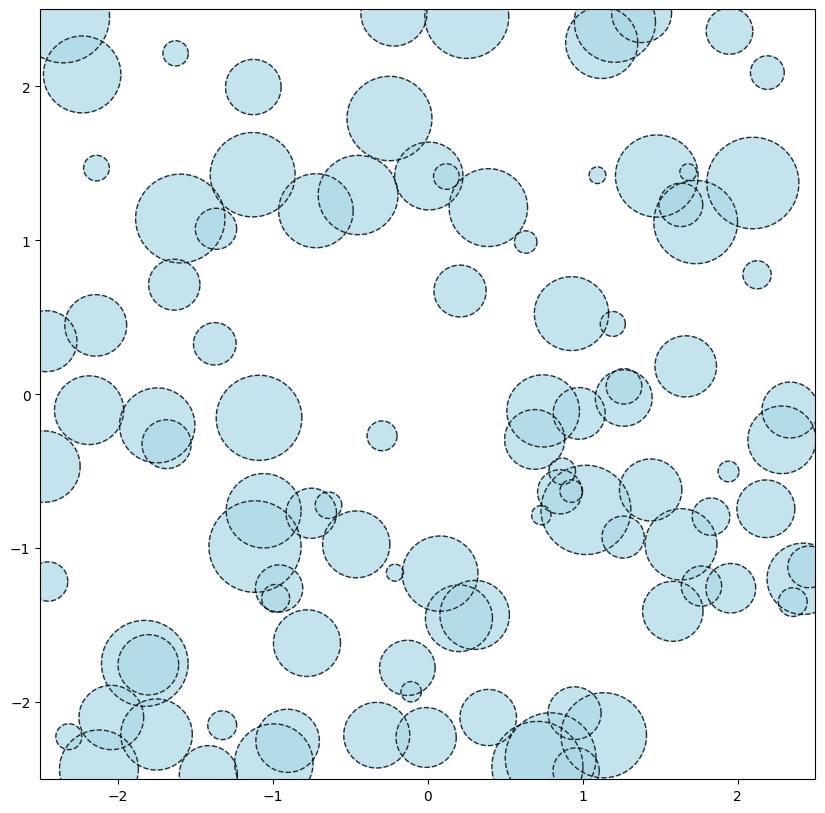

In [139]:
data = (atmosphere_plotting(1, 100, 10, 2.5))
end_final_position = [i for i in data]
print(end_final_position)